#  RESEARCH PROJECT B
Student: Mr Eloy Ruiz Donayre  
Supervisor: Prof Dr Achim Kehrein  

Reference Paper:  
> To sleep or not to sleep: the ecology of sleep in artificial organisms  
> Alberto Acerbi, Patrick McNamara and Charles L Nunn  
> https://doi.org/10.1186/1472-6785-8-10 

## Partial run: Two generations step by step
### Setting up modules

In [1]:
%matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style()

In [2]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from simulation_modules.rpb_agents import Animal, FoodPatch, SleepPatch
from simulation_modules.rpb_simmodel import SleepAnimals
from simulation_modules.rpb_experiment import *

Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\__init__.py
Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\rpb_agents.py
Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\rpb_simmodel.py
Importing C:\Users\EloyR\source\repos\research-project-b\simulation_modules\rpb_experiment.py


In [3]:
current_exp_id = 0
generation_number = 0
abm_models = []
generations = []
results = pd.DataFrame()

### Creating genomes of initial population
The array `genomes` represent the genomes of the first 100 individuals. Each gene in the genome has three possible values:  
`'flex' , 'eat' , 'sleep'`
A population of a hundred individuals is created.

In [30]:
genomes = genome_alternatives(100)
np.shape(genomes)
selected_genomes = genomes

array([['flex', 'eat', 'flex', ..., 'sleep', 'sleep', 'sleep'],
       ['sleep', 'eat', 'eat', ..., 'sleep', 'sleep', 'eat'],
       ['flex', 'eat', 'flex', ..., 'flex', 'sleep', 'flex'],
       ...,
       ['sleep', 'sleep', 'eat', ..., 'flex', 'sleep', 'eat'],
       ['flex', 'flex', 'eat', ..., 'sleep', 'sleep', 'sleep'],
       ['eat', 'sleep', 'eat', ..., 'flex', 'sleep', 'flex']], dtype='<U5')

### Agent-based model generation and execution (first generation)
In this step, an agent-based model (for fitness evaluation) is created for each indivual and stored in the `abm_models` array.
Considering that each model step represents one minute, we run each model for 7 days.

In [5]:
%%time
for current_exp_id in range(100*generation_number + 0, 100*generation_number + 100):
    i = current_exp_id
    abm_models.append( SleepAnimals(i, genome=selected_genomes[i-100*generation_number],  width=40, height=40) )
    for j in range(60*24*7):
        abm_models[i].step()

Wall time: 1min 32s


In [6]:
# a = model[0].datacollector.get_agent_vars_dataframe()
# final_fitness = a.xs(1,level="AgentID")[]

Example code for accessing properties of the agent.
`experiment_id` is the unique id of each model. (There is only one individual per model)

In [7]:
experiment_id = 20
abm_models[experiment_id].schedule.agents[0].fitness
abm_models[experiment_id].schedule.agents[0].fitness_food
abm_models[experiment_id].schedule.agents[0].fitness_sleep

1.0

### Data collection and evaluation of fitness of individuals
From the `abm_models` array, a list `current_generation` is constructed in which each row consists of:  
`experiment_id , fitness of the individual on the last step, genome of the agent`    
This list is then sorted in descending order of fitness values.

In [8]:
current_generation = []
for i in range(100*generation_number + 0, 100*generation_number + 100):
    a = [ abm_models[i].model_id , abm_models[i].schedule.agents[0].fitness , 
         abm_models[i].schedule.agents[0].circadian_rythm ]
    current_generation.append( a )

In [9]:
generation_results = dataframe_generation(generation_number , current_generation)
results = results.append(generation_results)

In [10]:
current_generation.sort(key = lambda x : x[1], reverse=True)
generation_number += 1

The array `generations` will store the captured data of each generation.

In [11]:
generations.append( current_generation )

### Evaluation of individuals and creation of new population (2nd generation)
After the end of the first generation, the 20 fittest individuals are selected and the other 80 are discarded.  
From each one of these selected individuals, 5 new individuals are created. Thus, maintaining the population size.  
Each `gene` has a 5% chance of mutation. In case of mutation, it can take any of the other three available three gene values.

In [12]:
# Variables for the mutation probability and the storage of the genomes for the current
# generation. 
p = 0.05
selected_genomes = np.full( (100 , 24) , 'sleep')

In [13]:
# This loop assigns the gene values to the new individuals, from the most fit individuals
# in the previous generation.
# During each gene assignation, mutation can occurr with a chance of 1 mutation per every
# 20 genes.
for i in range(20):
    for j in range(5):
        for k in range(24):
            a = current_generation[i][2][k]
            a = mutation_gene( a , p )
            selected_genomes[int(100/20)*i + j] [k] = a

### Simulation execution for second generation

In [14]:
# Reading some values
generation_number , current_exp_id

(1, 99)

Running the simulation for the whole new generation.

In [15]:
%%time
for current_exp_id in range(100*generation_number + 0, 100*generation_number + 100):
    i = current_exp_id
    abm_models.append( SleepAnimals(i, genome=selected_genomes[i-100*generation_number],  width=40, height=40) )
    for j in range(60*24*7):
        abm_models[i].step()

Wall time: 55.3 s


Capturing data.

In [16]:
current_generation = []
for i in range(100*generation_number + 0, 100*generation_number + 100):
    a = [ abm_models[i].model_id , abm_models[i].schedule.agents[0].fitness , abm_models[i].schedule.agents[0].circadian_rythm ]
    current_generation.append( a )

In [17]:
generation_results = dataframe_generation(generation_number , current_generation)
results = results.append(generation_results)

In [18]:
current_generation.sort(key = lambda x : x[1], reverse=True)
generation_number += 1

In [19]:
generations.append( current_generation )

Creating new individuals

In [29]:
selected_genomes = np.full( (100 , 24) , 'sleep')
for i in range(20):
    for j in range(5):
        for k in range(24):
            a = current_generation[i][2][k]
            a = mutation_gene( a , p )
            selected_genomes[int(100/20)*i + j] [k] = a
selected_genomes

array([['sleep', 'sleep', 'flex', ..., 'eat', 'sleep', 'sleep'],
       ['sleep', 'sleep', 'flex', ..., 'eat', 'sleep', 'sleep'],
       ['sleep', 'sleep', 'flex', ..., 'eat', 'sleep', 'sleep'],
       ...,
       ['sleep', 'sleep', 'sleep', ..., 'eat', 'sleep', 'sleep'],
       ['sleep', 'sleep', 'flex', ..., 'eat', 'sleep', 'sleep'],
       ['sleep', 'sleep', 'flex', ..., 'eat', 'sleep', 'sleep']],
      dtype='<U5')

### Some results

#### 1st generation data

This are the models with the highest fitness in the first generation:

In [21]:
gen1_mostfit = [ generations[0][0][0] , generations[0][1][0], generations[0][2][0], 
               generations[0][3][0] , generations[0][4][0]]
gen1_mostfit

[90, 98, 32, 43, 91]

This shows the genome of the 10 most fit individuals of the first generation, color coded (Green = Eat genome, Lila = Sleep genome, Light blue = flexible genome)

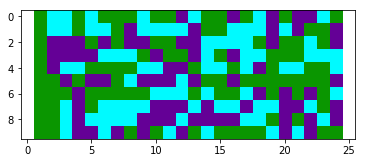

In [22]:
genome_display_1gen = displayRGB_generation(1, 10, generations)
_ = plt.imshow(np.swapaxes(genome_display_1gen,0,1))

Plotting the "Fitness vs Timestep" of the five most fit agents.

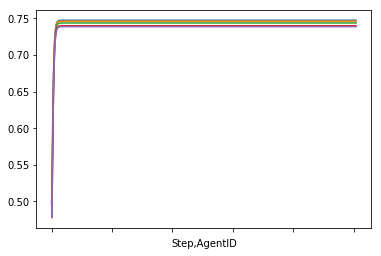

In [23]:
results_1stgen_1st = abm_models[gen1_mostfit[0]].datacollector.get_agent_vars_dataframe()
results_1stgen_2st = abm_models[gen1_mostfit[1]].datacollector.get_agent_vars_dataframe()
results_1stgen_3rd = abm_models[gen1_mostfit[2]].datacollector.get_agent_vars_dataframe()
results_1stgen_4th = abm_models[gen1_mostfit[3]].datacollector.get_agent_vars_dataframe()
results_1stgen_5th = abm_models[gen1_mostfit[4]].datacollector.get_agent_vars_dataframe()
_ = results_1stgen_1st.Fitness.plot()
_ = results_1stgen_2st.Fitness.plot()
_ = results_1stgen_3rd.Fitness.plot()
_ = results_1stgen_4th.Fitness.plot()
_ = results_1stgen_5th.Fitness.plot()

Dataframe of the 1st generation showing: 20 most fit agents, fitness in the last step and genome.

In [24]:
results.loc['1st'].nlargest(20,'fitness')

,u_id,fitness,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
individual,,,,,,,,,,,,,,,,,,,,,
091,90,0.747500,S,F,F,S,F,S,S,S,...,S,E,S,F,E,S,E,E,F,S
099,98,0.746250,S,F,F,S,F,F,S,E,...,S,F,F,F,E,F,E,S,S,E
033,32,0.743751,S,E,E,E,S,E,S,E,...,F,F,F,S,E,S,S,F,S,E
044,43,0.740005,S,E,E,E,E,F,F,F,...,S,E,F,F,S,S,S,F,F,F
092,91,0.738758,S,E,F,F,S,S,S,S,...,F,S,F,E,S,F,F,S,S,F
039,38,0.730043,S,S,E,S,E,E,S,F,...,S,E,S,S,S,S,S,S,S,E
093,92,0.722610,S,S,S,E,S,S,S,S,...,S,S,F,E,S,E,S,E,S,F
096,95,0.712779,S,S,F,E,S,F,F,F,...,F,F,E,F,F,E,E,F,S,E
070,69,0.697063,S,S,F,E,F,F,F,F,...,E,E,F,F,S,E,S,E,F,E


#### 2nd generation data

This are the models with the highest fitness in the second generation:

In [25]:
gen2_mostfit = [ generations[1][0][0] , generations[1][1][0], generations[1][2][0], 
               generations[1][3][0] , generations[1][4][0]]
gen2_mostfit

[147, 164, 198, 110, 191]

This shows the genome of the 10 most fit individuals of the first generation, color coded (Green = Eat genome, Lila = Sleep genome, Light blue = flexible genome)

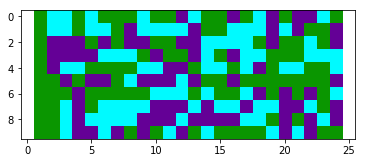

In [26]:
genome_display_2gen = displayRGB_generation(2, 10, generations)
_ = plt.imshow(np.swapaxes(genome_display_1gen,0,1))

Plotting the "Fitness vs Timestep" of the five most fit agents.

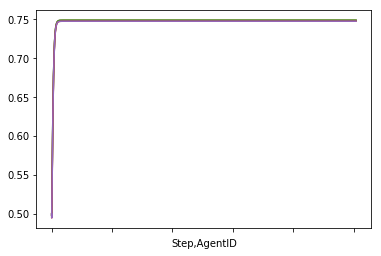

In [27]:
results_2gen_1st = abm_models[gen2_mostfit[0]].datacollector.get_agent_vars_dataframe()
results_2gen_2st = abm_models[gen2_mostfit[1]].datacollector.get_agent_vars_dataframe()
results_2gen_3rd = abm_models[gen2_mostfit[2]].datacollector.get_agent_vars_dataframe()
results_2gen_4th = abm_models[gen2_mostfit[3]].datacollector.get_agent_vars_dataframe()
results_2gen_5th = abm_models[gen2_mostfit[4]].datacollector.get_agent_vars_dataframe()
_ = results_2gen_1st.Fitness.plot()
_ = results_2gen_2st.Fitness.plot()
_ = results_2gen_3rd.Fitness.plot()
_ = results_2gen_4th.Fitness.plot()
_ = results_2gen_5th.Fitness.plot()

Dataframe of the 2nd generation showing: 20 most fit agents, fitness in the last step and genome.

In [28]:
results.loc['2nd'].nlargest(20,'fitness')

,u_id,fitness,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
individual,,,,,,,,,,,,,,,,,,,,,
048,147,0.748750,S,S,F,E,E,F,E,S,...,S,E,S,S,F,E,F,E,S,S
065,164,0.748750,S,S,F,S,S,S,E,F,...,E,F,S,F,S,E,F,S,S,F
099,198,0.748750,S,F,E,S,F,F,S,E,...,E,E,S,F,S,S,F,E,E,E
011,110,0.747500,S,E,E,E,S,E,S,E,...,F,F,F,S,E,S,S,F,S,E
092,191,0.747500,S,F,E,E,S,S,F,S,...,S,E,S,F,S,F,E,E,S,F
040,139,0.746250,S,S,F,E,S,F,F,F,...,F,F,E,F,F,E,E,F,S,E
019,118,0.745001,S,E,E,E,E,F,F,F,...,S,E,F,F,S,S,E,F,F,F
079,178,0.745001,S,S,S,S,S,S,S,S,...,E,E,S,E,F,E,E,F,F,S
084,183,0.745001,S,E,E,E,E,E,F,F,...,S,E,E,E,S,E,S,E,E,S
